<a href="https://colab.research.google.com/github/PatilTruptiU/Bike-Sharing-Demand-Prediction--ML-project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/almabetter/projects/ ML Supervised regression/SeoulBikeData.csv')

In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataset['Rented Bike Count'].describe(include='all')

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

here seasons, holiday and functioning day are having catrgrical data 

In [ ]:
dataset.shape

(8760, 14)

In [ ]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#check dublicates 
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## EDA

In [ ]:
#Extracting categorical features
categorical_features= dataset.select_dtypes(include='object')
categorical_features

,Date,Seasons,Holiday,Functioning Day
0,01-12-2017,Winter,No Holiday,Yes
1,01-12-2017,Winter,No Holiday,Yes
2,01-12-2017,Winter,No Holiday,Yes
3,01-12-2017,Winter,No Holiday,Yes
4,01-12-2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30-11-2018,Autumn,No Holiday,Yes
8756,30-11-2018,Autumn,No Holiday,Yes
8757,30-11-2018,Autumn,No Holiday,Yes
8758,30-11-2018,Autumn,No Holiday,Yes


In [ ]:
# firstily here i extracting day month and year from date
# converting date column dtype object to date 
dataset['Date']=pd.to_datetime(dataset['Date'])

In [ ]:
dataset['day_of_week'] = dataset['Date'].dt.day_name()
dataset['month'] = dataset['Date'].apply(lambda x : x.month)
dataset["year"] = dataset['Date'].map(lambda x: x.year).astype("object")
dataset['weekdays_weekend']=dataset['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
dataset=dataset.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
dataset['year']=dataset['year'].astype('int64')

In [ ]:
#again checking categorical features
categorical_features= dataset.select_dtypes(include='object')
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [ ]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seasons          8760 non-null   object
 1   Holiday          8760 non-null   object
 2   Functioning Day  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


Text(0, 0.5, 'Rented_Bike_Count')

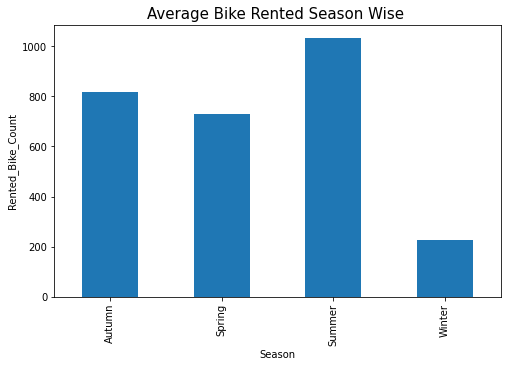

In [ ]:
d1= dataset.groupby(['Seasons'])['Rented Bike Count'].mean().plot.bar(
    figsize = (8,5),
    fontsize = 10
)
# set the title and lebel to x and y axis
d1.set_title("Average Bike Rented Season Wise ", fontsize = 15)
d1.set_xlabel("Season", fontsize = 10)
d1.set_ylabel("Rented_Bike_Count", fontsize = 10)


In [ ]:
print(dataset[dataset['Seasons']== 'Autumn']['Rented Bike Count'].mean().round())
print(dataset[dataset['Seasons']== 'Spring']['Rented Bike Count'].mean().round())
print(dataset[dataset['Seasons']== 'Summer']['Rented Bike Count'].mean().round())
print(dataset[dataset['Seasons']== 'Winter']['Rented Bike Count'].mean().round())


820.0
730.0
1034.0
226.0


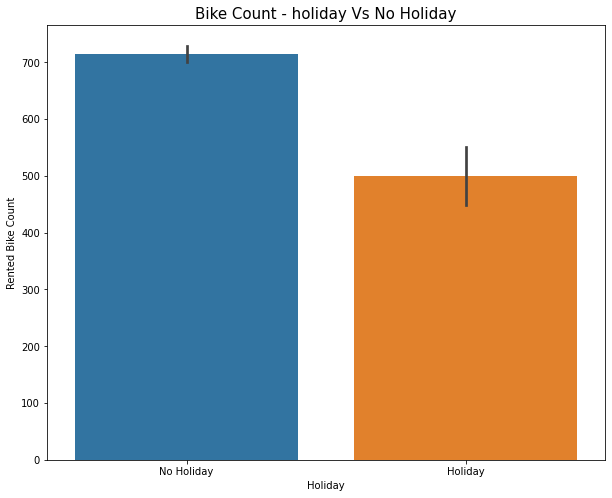

In [ ]:
plt.figure(figsize=(10,8))
p=sns.barplot(x=dataset['Holiday'],y=dataset['Rented Bike Count'])
p.set_title('Bike Count - holiday Vs No Holiday',fontsize= 15 )
plt.show()

by consideing working days i.e. no holiday has comparatively high demand of rented bike as compared to non working day i.e. holiday

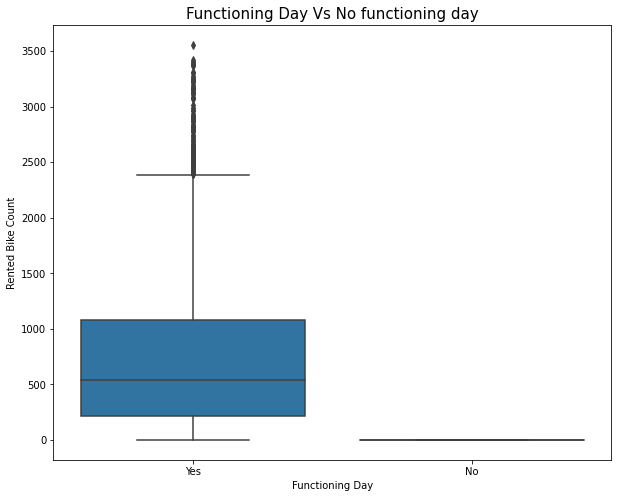

In [ ]:
plt.figure(figsize=(10,8))
p=sns.boxplot(x=dataset['Functioning Day'],y=dataset['Rented Bike Count'])
p.set_title('Functioning Day Vs No functioning day',fontsize= 15 )
plt.show()

As cleared  plot functioning days has comparatively vey high demand of rented bike as compared to non functioning day.

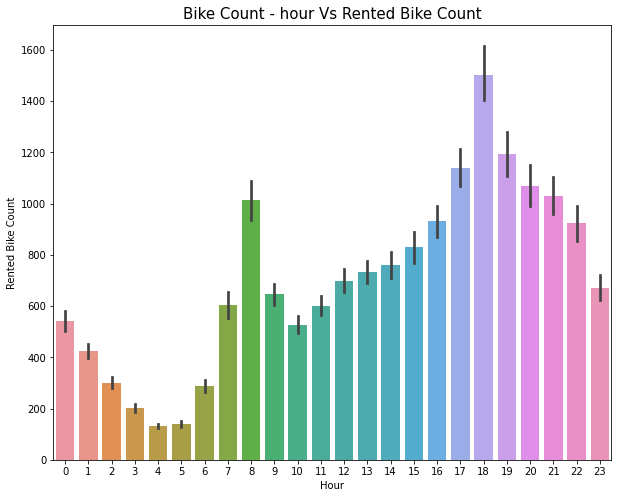

In [ ]:
plt.figure(figsize=(10,8))
p=sns.barplot(x=dataset['Hour'],y=dataset['Rented Bike Count'])
p.set_title('Bike Count - hour Vs Rented Bike Count',fontsize= 15 )
plt.show()

from this graph it is clear that at the moring in between 7am to 9am and at evening between 5pm to 7pm their is high demand.
menas from this we say that at office time high demands of bike.

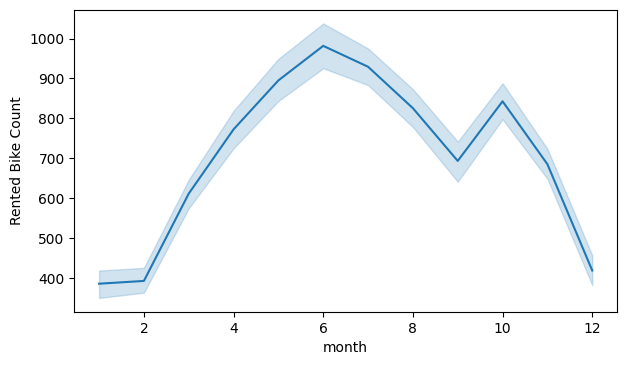

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.lineplot(x='month',y='Rented Bike Count',data=dataset)
plt.show()

we can see that there less demand of Rented bike in the month of  january,February,march i.e during cold winter seasons

Also demand of bike is maximum during May,June i.e during hot Summer seasons and octomber month also.

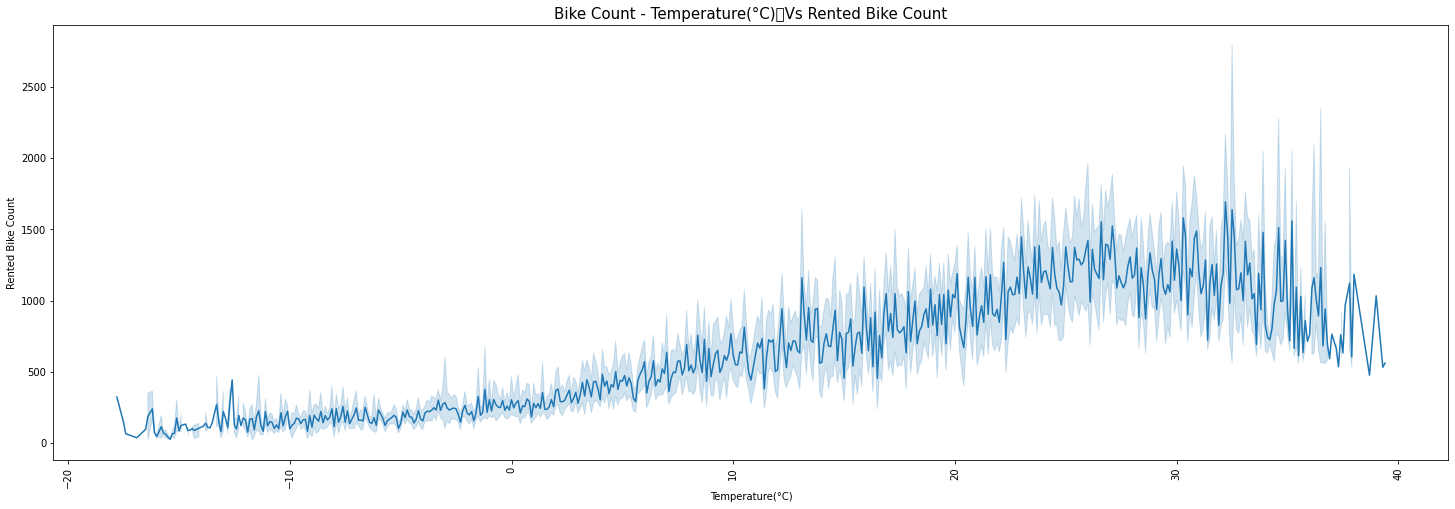

In [ ]:
plt.figure(figsize=(25,8))
p=sns.lineplot(x=dataset['Temperature(°C)'],y=dataset['Rented Bike Count'])
p.set_title('Bike Count - Temperature(°C)	Vs Rented Bike Count',fontsize= 15 )
plt.xticks(rotation=90)
plt.show()

we can say that if Temprature increase demand of Rented Bike Decrease

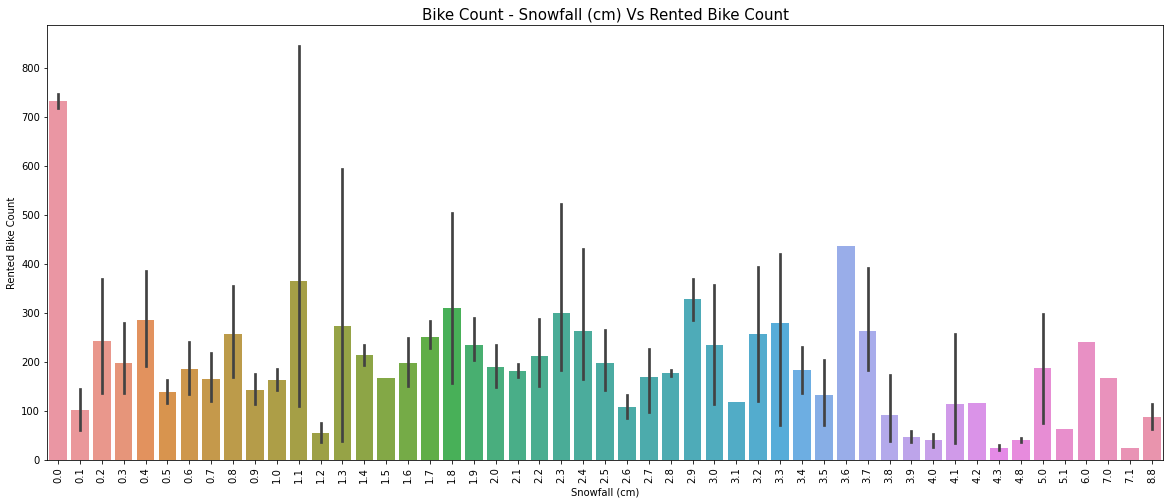

In [ ]:
plt.figure(figsize=(20,8))
p=sns.barplot(x=dataset['Snowfall (cm)'],y=dataset['Rented Bike Count'])
p.set_title('Bike Count - Snowfall (cm) Vs Rented Bike Count',fontsize= 15 )
plt.xticks(rotation=90)
plt.show()

we can see that if Snowfall increase demand of Rented Bike Decreases

In [ ]:
#Extracting Numeric Features
numeric_features= dataset.select_dtypes(exclude='object')
numeric_features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,2018,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,2018,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,2018,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,2018,0


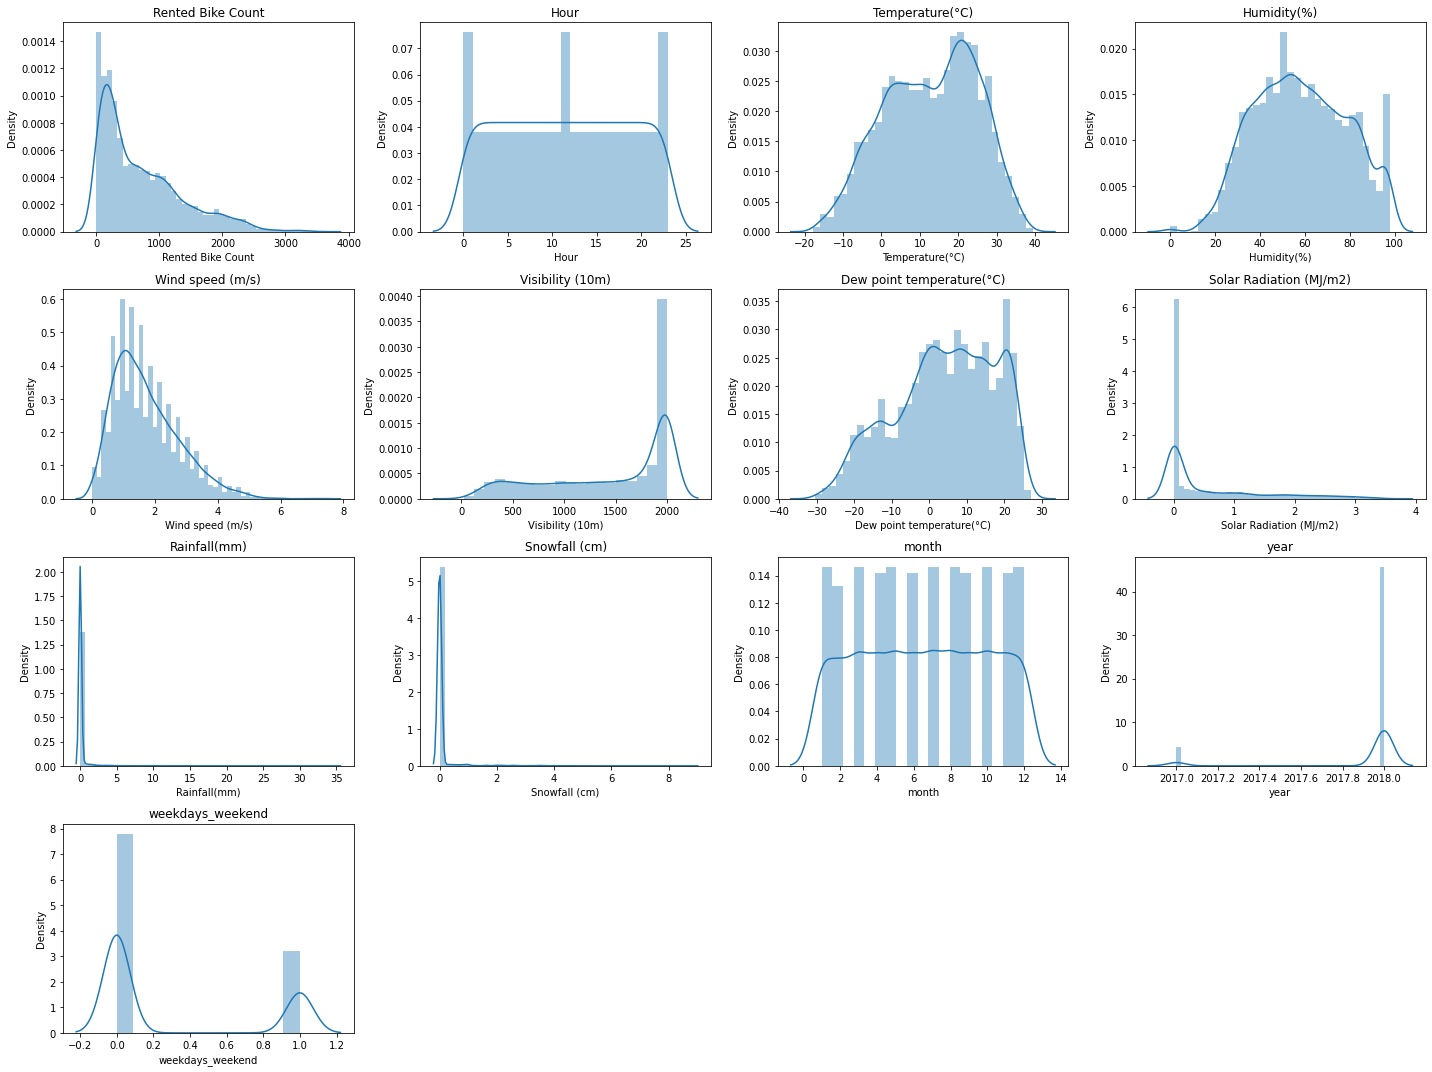

In [ ]:
#Distrubution of Data for numberic feature
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.distplot(dataset[i])
  plt.title(i)
  plt.tight_layout()

In [ ]:
print(dataset['Temperature(°C)'].unique())

[ -5.2  -5.5  -6.   -6.2  -6.4  -6.6  -7.4  -7.6  -6.5  -3.5  -0.5   1.7
   2.4   3.    2.1   1.2   0.8   0.6   0.   -0.3  -0.8  -0.9  -1.3  -1.8
  -2.2  -2.9  -3.8  -4.   -4.3  -4.4  -4.2  -0.4   1.9   4.3   6.    7.3
   7.6   6.4   5.5   5.    4.6   4.1   3.5   4.    3.9   3.3   3.4   3.1
   3.2   4.4   5.1   5.8   6.8   8.    6.7   5.7   5.2   4.7   4.2   3.6
   2.8   2.    0.2  -1.5  -1.1   0.1  -0.1  -0.2  -2.1  -3.6  -4.6  -5.3
  -5.8  -6.1  -6.8  -6.9  -7.2  -7.5  -8.1  -3.9  -2.3  -1.6  -0.7  -2.6
  -3.2  -3.7  -2.8  -2.5  -3.   -3.4  -3.3   1.6   5.3   1.1   1.3   1.4
   1.5   1.    0.3   2.3   3.7   0.7  -1.4  -2.7  -4.8  -7.   -6.7  -2.
  -1.7  -2.4  -3.1  -4.1  -4.7  -5.1  -5.4   2.5   0.4   0.5   0.9   5.4
  -1.   -5.6  -5.9  -7.1  -7.9  -8.6  -9.3  -9.7 -10.2 -10.7 -11.  -11.2
 -11.5 -11.6 -11.8 -12.1 -12.3 -10.5  -9.4  -8.3  -7.7  -8.2  -8.4  -8.8
  -9.   -9.5 -10.4 -10.9 -11.4 -11.9 -11.7 -11.1  -4.9  -4.5  -8.9  -9.2
  -9.8 -10.6 -10.8  -5.7  -6.3  -5.   -7.3  -8.   -8

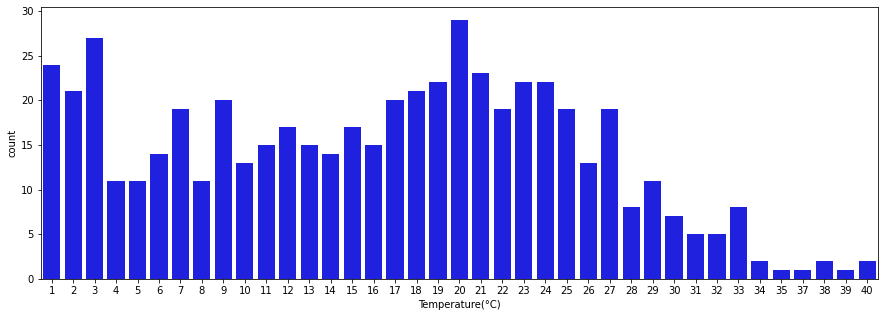

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(dataset['Temperature(°C)'].value_counts(),color='blue')
plt.show()

In [ ]:
print(dataset['Snowfall (cm)'].unique())

[0.  0.1 0.3 0.4 0.2 1.  0.9 0.8 0.7 0.6 2.7 4.  4.1 4.3 3.9 3.1 2.1 1.4
 0.5 1.3 1.8 2.  4.8 5.1 5.  4.2 3.2 2.6 2.5 2.3 2.2 1.9 1.7 1.6 2.4 1.2
 1.1 3.  3.3 3.5 3.4 2.8 1.5 3.8 3.7 7.1 8.8 7.  6.  3.6 2.9]


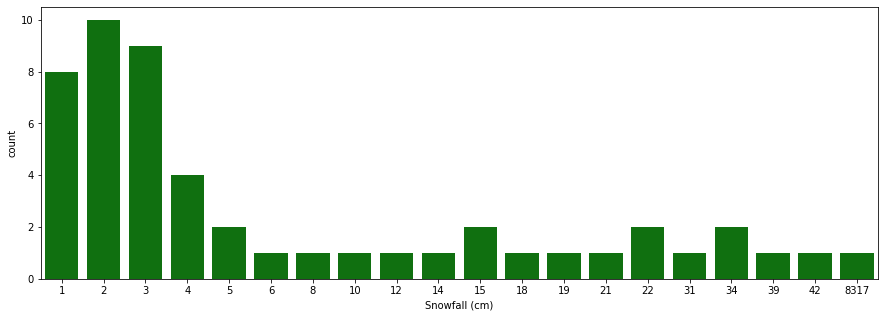

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(dataset['Snowfall (cm)'].value_counts(),color='green')
plt.show()

As snowfall increases demand of rented bike decreases

In [ ]:
print(dataset['Rainfall(mm)'].unique())

[ 0.   0.5  1.   2.5  0.1  0.2  0.3  0.7  1.6  0.4  1.1  6.4  9.5  3.5
  0.9  3.3  1.4  1.5  3.7  4.5  9.   2.   8.  17.   7.   3.   1.9  0.8
  4.   6.   5.   5.5  2.4 35.  19.  13.5 10.  12.5 11.5  5.4 10.5  6.5
 16.  14.5  4.9 21.5 12.  18.5  7.5 24.   8.5  7.3  1.3 15.5 29.5 21.
 13.   1.2 18.   9.1  1.8]


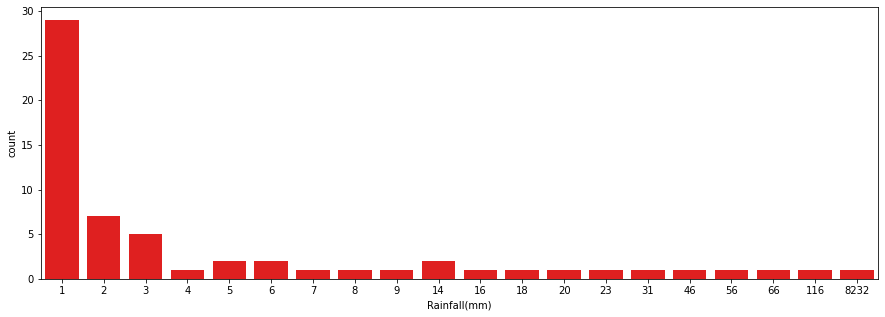

In [ ]:
dataset['Rainfall(mm)'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(dataset['Rainfall(mm)'].value_counts(),color='red')
plt.show()

When the rainfall was less, people have booked more bikes.

<function matplotlib.pyplot.show(*args, **kw)>

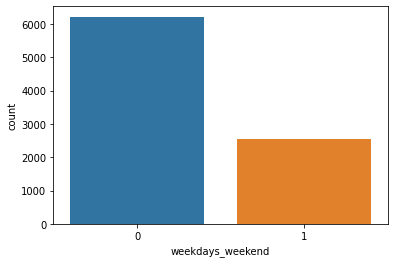

In [ ]:
p=sns.countplot(dataset['weekdays_weekend'])
plt.show

As compair to weekdays their is less demand on weekends 

In [ ]:
dataset['Hour'].unique()
#d2=dataset['Hour'].value_count()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

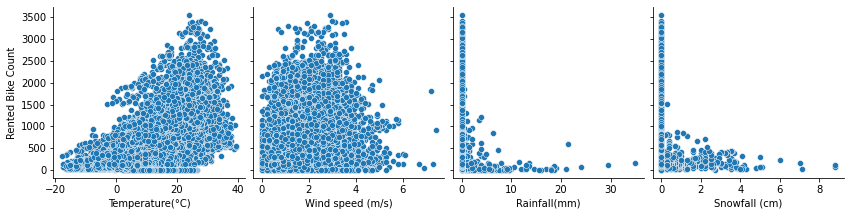

In [ ]:
sns.pairplot(dataset,x_vars=['Temperature(°C)','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)'],y_vars=['Rented Bike Count'],height=3,markers=["o", "s", "D"],)

In [ ]:
numeric_features.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'year', 'weekdays_weekend'],
      dtype='object')

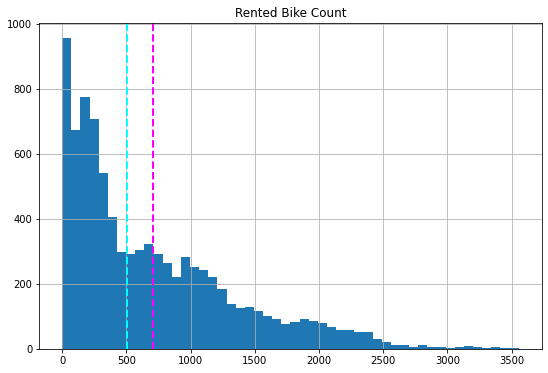

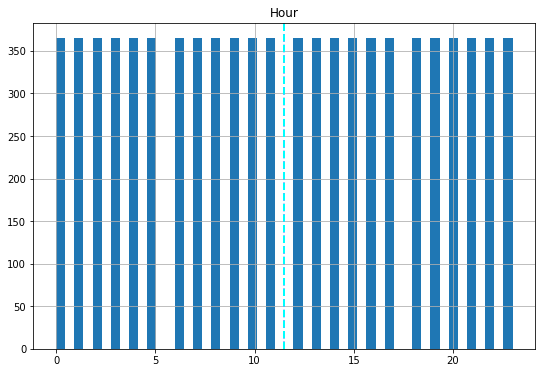

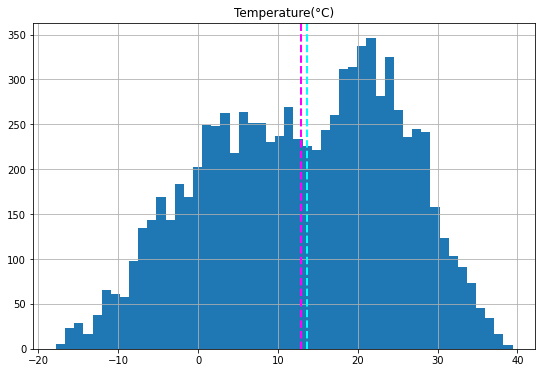

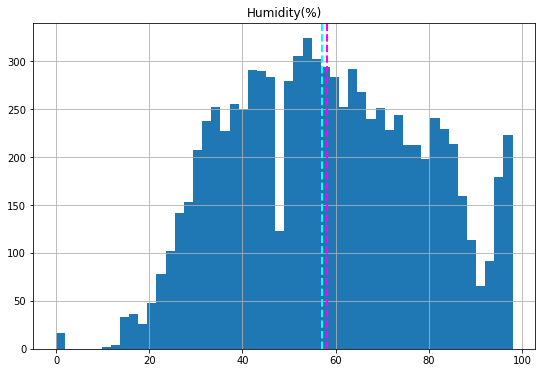

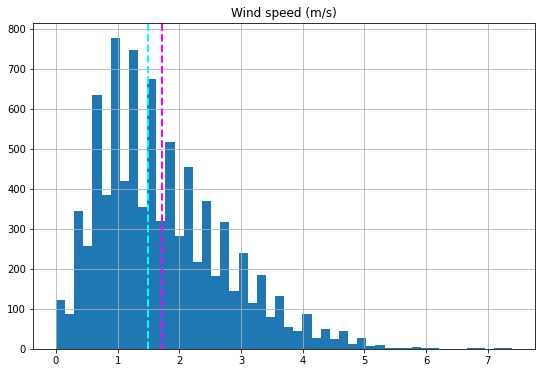

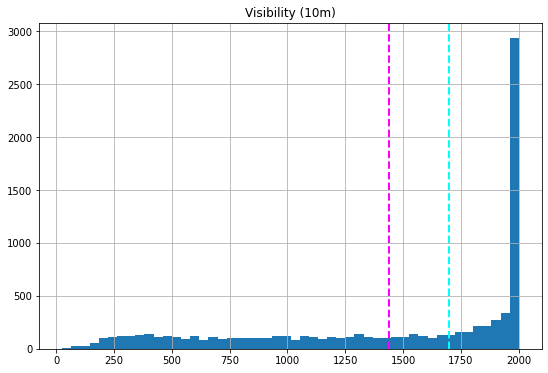

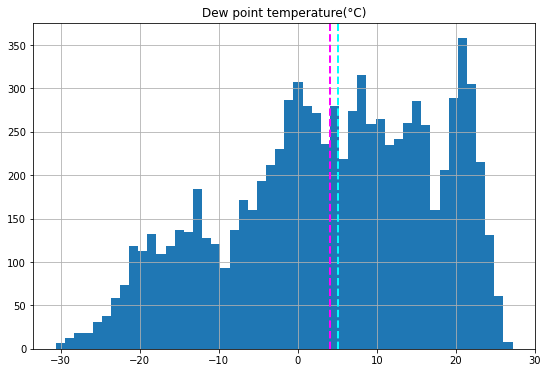

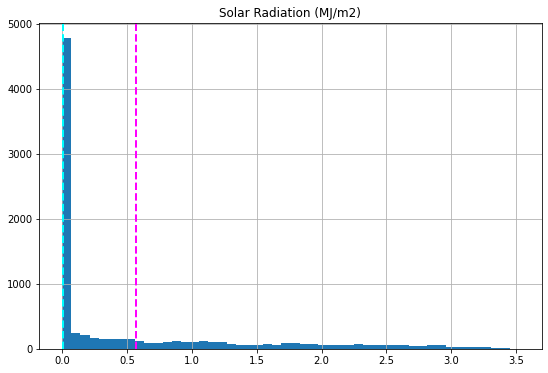

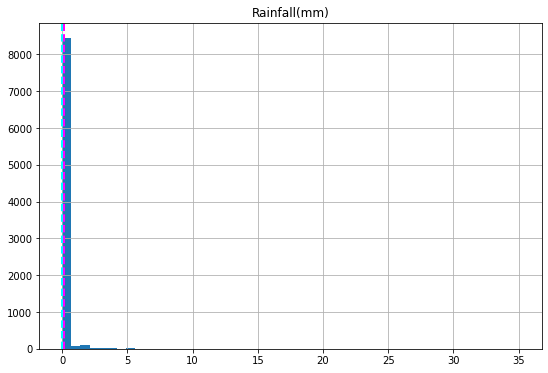

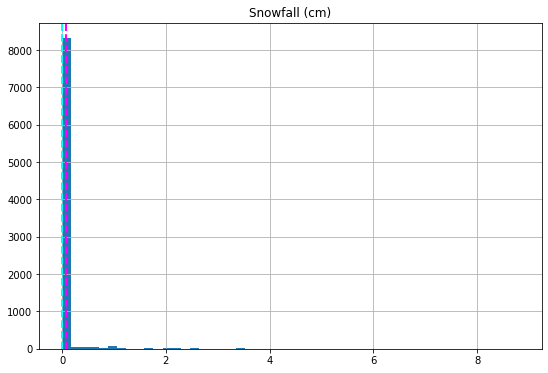

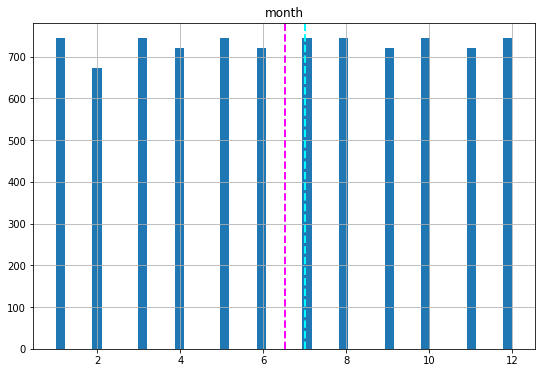

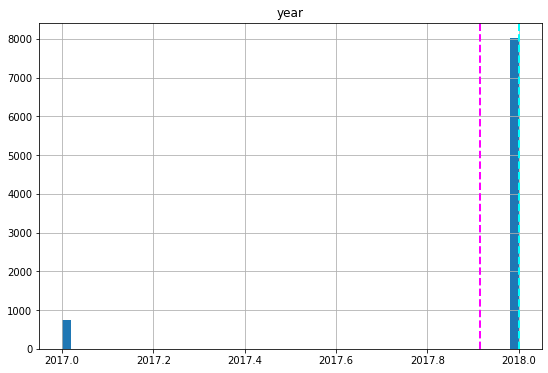

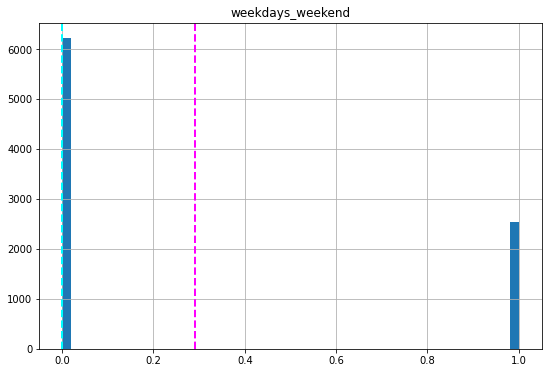

In [ ]:
#plot a bar plot for each numerical feature count 

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset[col].hist(bins=50, ax = ax)
    feature = dataset[col]
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

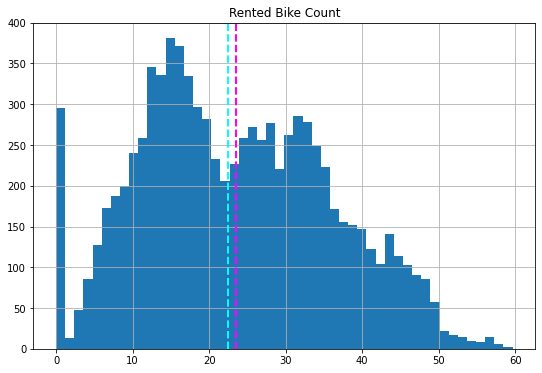

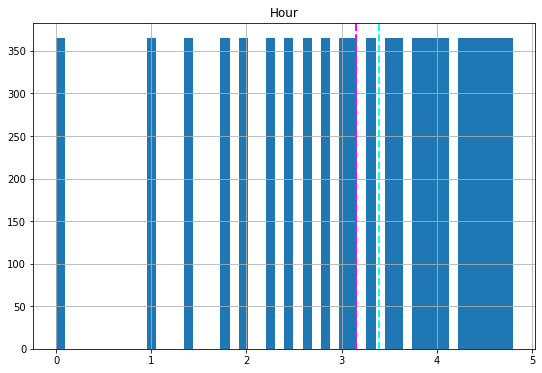

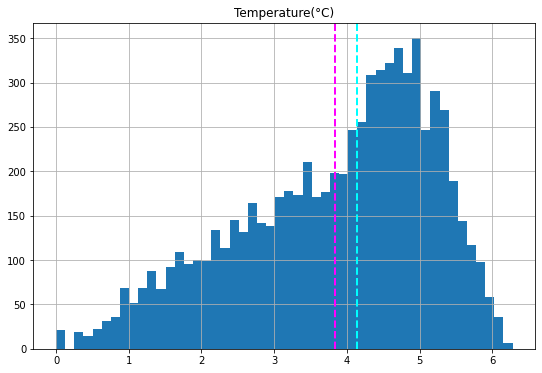

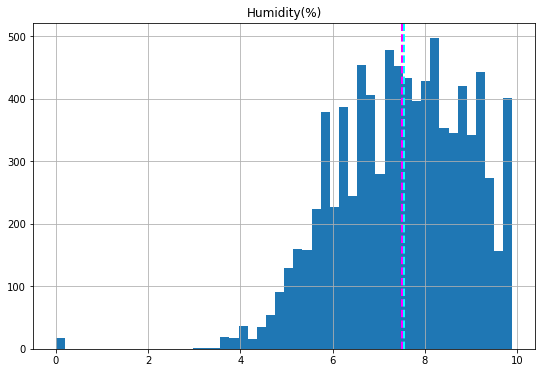

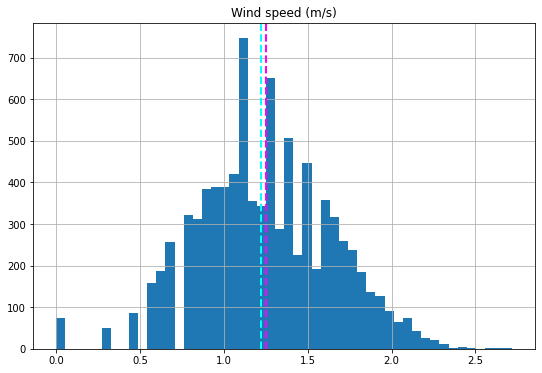

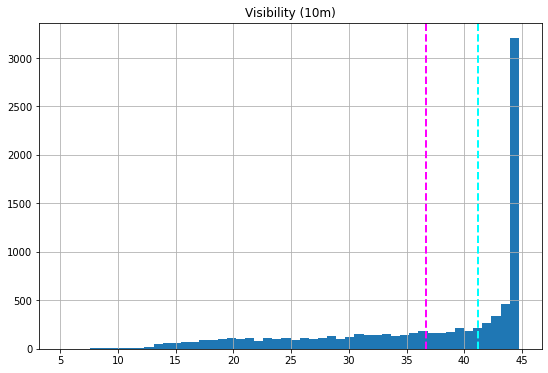

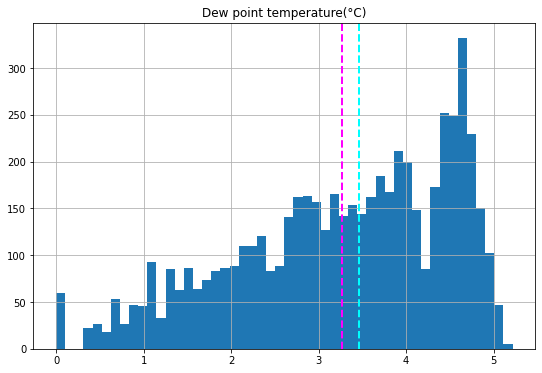

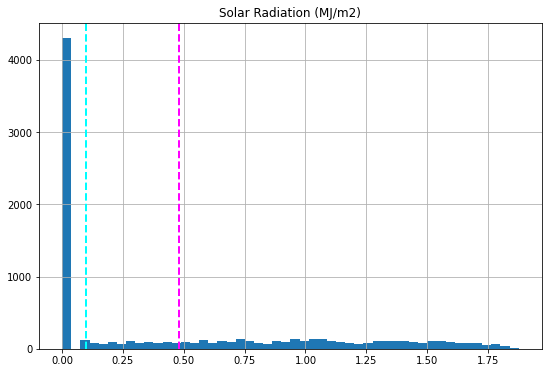

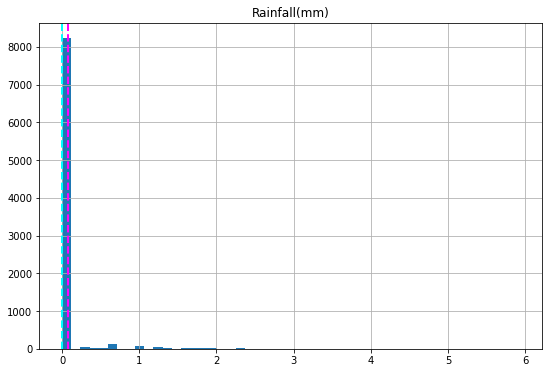

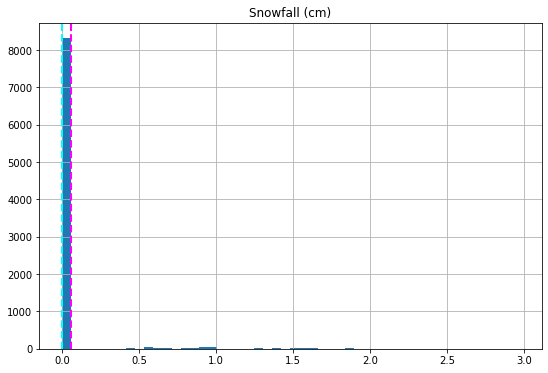

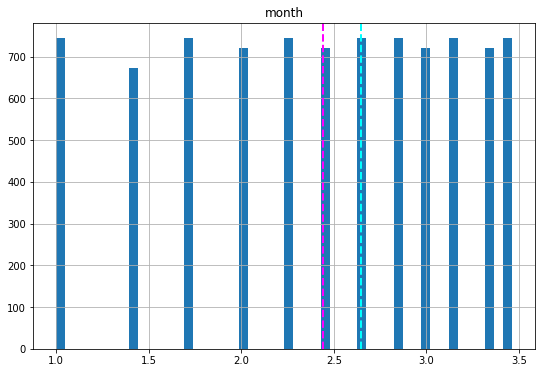

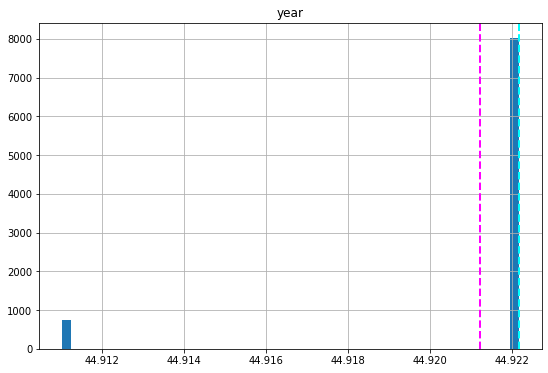

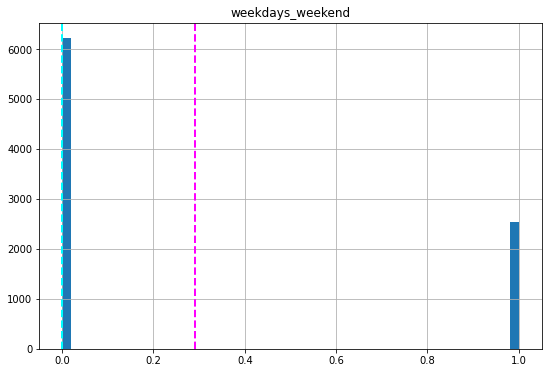

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

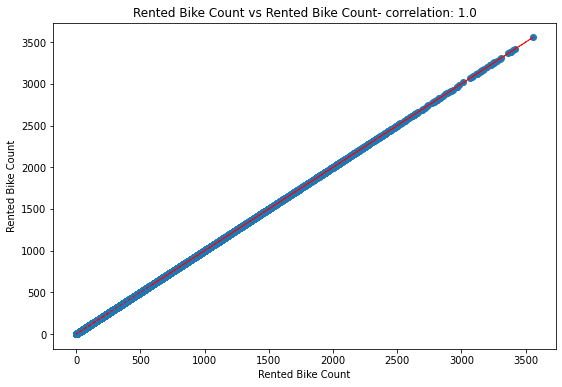

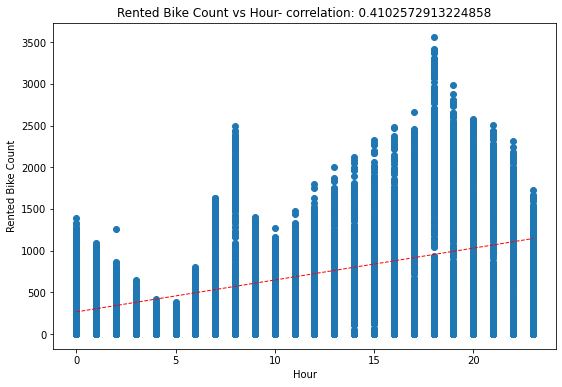

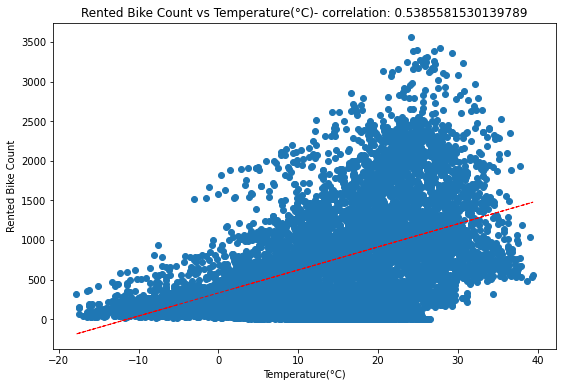

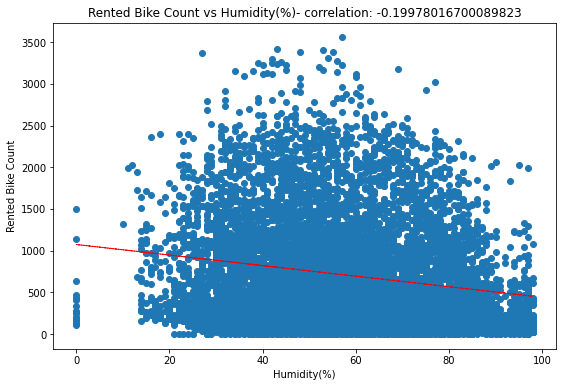

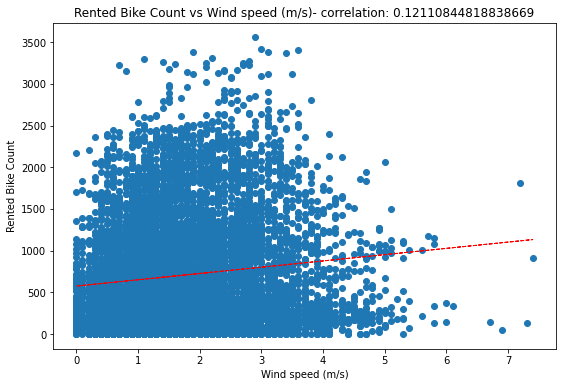

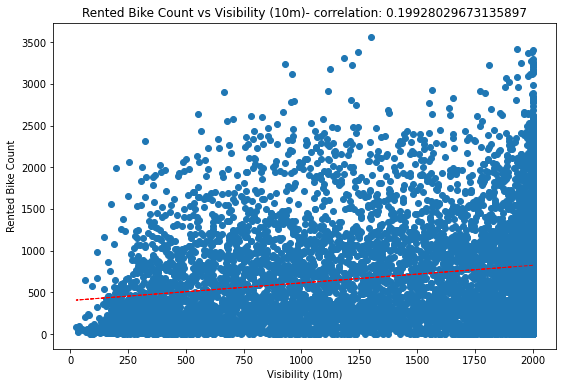

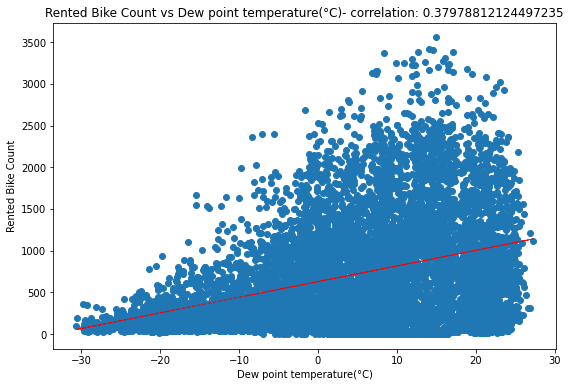

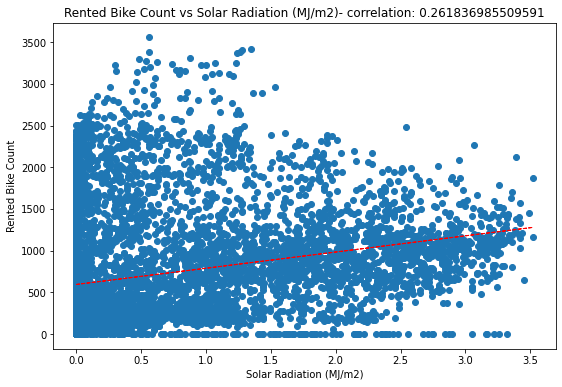

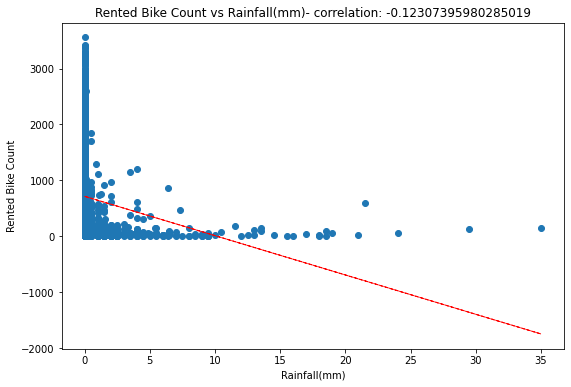

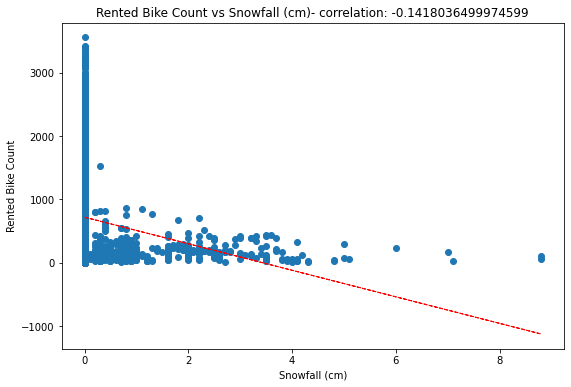

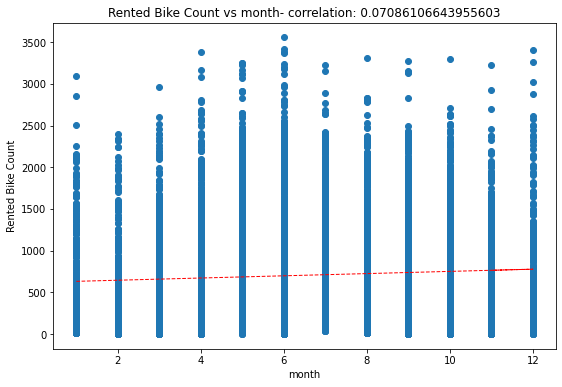

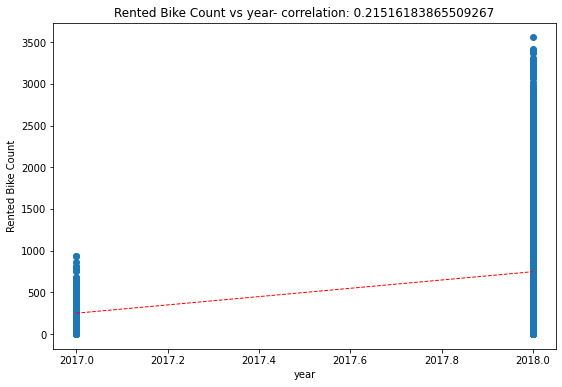

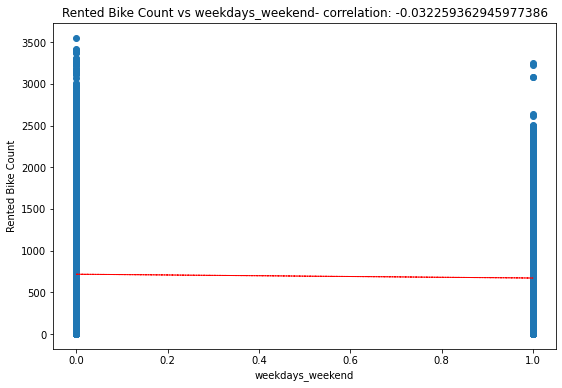

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
#One hot encoding : Create dummy variables for the catgeorical variables and Drop the original columns from the dataframe
df= pd.get_dummies(columns=['Seasons','Holiday', 'Functioning Day'], data= dataset,drop_first= True)

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'year', 'weekdays_weekend', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,0,0,0,1,1,1


In [ ]:
df.shape

(8760, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  year                       8760 non-null   int64  
 12  weekdays_weekend           8760 non-null   int64  
 13  Seasons_Spring             8760 non-null   uint8

In [ ]:
#lets check the corelation and multicolinarity

In [ ]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,2.151618e-01,-3.225936e-02,2.288822e-02,2.965494e-01,-4.249251e-01,7.233757e-02,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.036729e-15,2.336763e-14,-2.300554e-17,-1.159917e-15,8.578102e-16,-1.697335e-15,1.289087e-16,0.005439
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,3.777958e-01,-1.297241e-02,7.959684e-03,6.658462e-01,-7.387196e-01,5.593084e-02,-0.050170
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,3.592468e-02,-3.674982e-02,1.569416e-02,1.925949e-01,-2.382952e-01,5.027765e-02,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-3.780878e-03,-2.239107e-02,8.385451e-02,-6.469790e-02,1.091865e-01,-2.301677e-02,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,5.238110e-02,3.064954e-02,-1.874983e-01,6.195792e-02,8.616224e-03,-3.177281e-02,-0.026000
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,3.363497e-01,-2.896569e-02,2.055888e-03,6.523778e-01,-7.223664e-01,6.675910e-02,-0.052837
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,1.280860e-01,8.271095e-03,7.997416e-02,1.284017e-01,-1.784202e-01,5.077255e-03,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,2.752192e-02,-1.427960e-02,1.759519e-02,5.392817e-02,-5.875456e-02,1.426911e-02,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-2.064178e-01,-2.255705e-02,-9.978516e-02,-9.978516e-02,2.258745e-01,1.259072e-02,0.032089


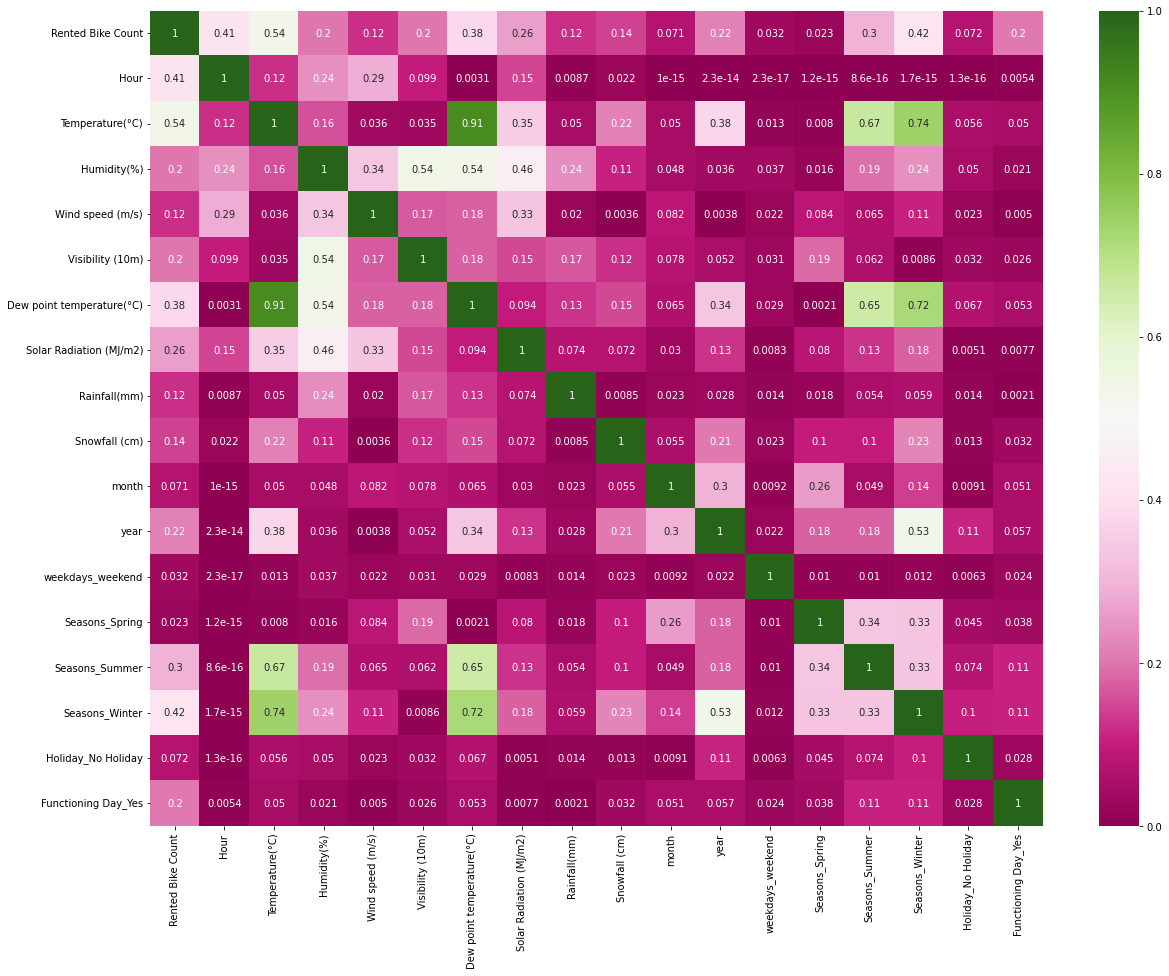

In [ ]:
plt.figure(figsize=(20,15))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap="PiYG")

as their is high correlation between Tempreature and dew point temprature so i am going to drop dew point temprature column.


In [ ]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calculate_vif(df[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,4.445856
1,Temperature(°C),3.515985
2,Humidity(%),23.371753
3,Wind speed (m/s),4.837073
4,Visibility (10m),10.394785
5,Solar Radiation (MJ/m2),2.751327
6,Rainfall(mm),1.089848
7,Snowfall (cm),1.128318
8,month,4.720191
9,year,55.901330


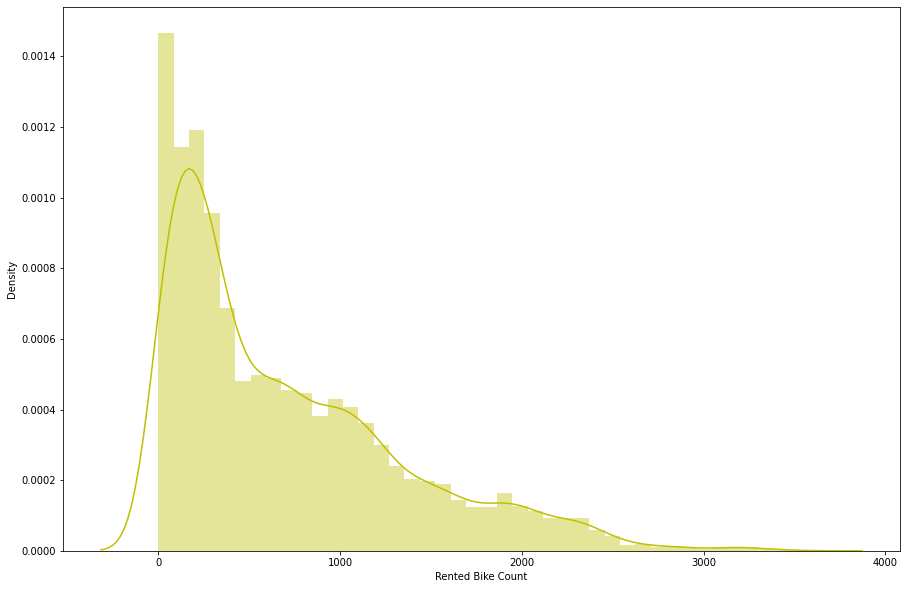

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['Rented Bike Count'],color="y")



```
# This is formatted as code
```

as it is right skewed therefore to normalize it we uae square_root transformation ,log trsformation etc. here I use square_root transformation

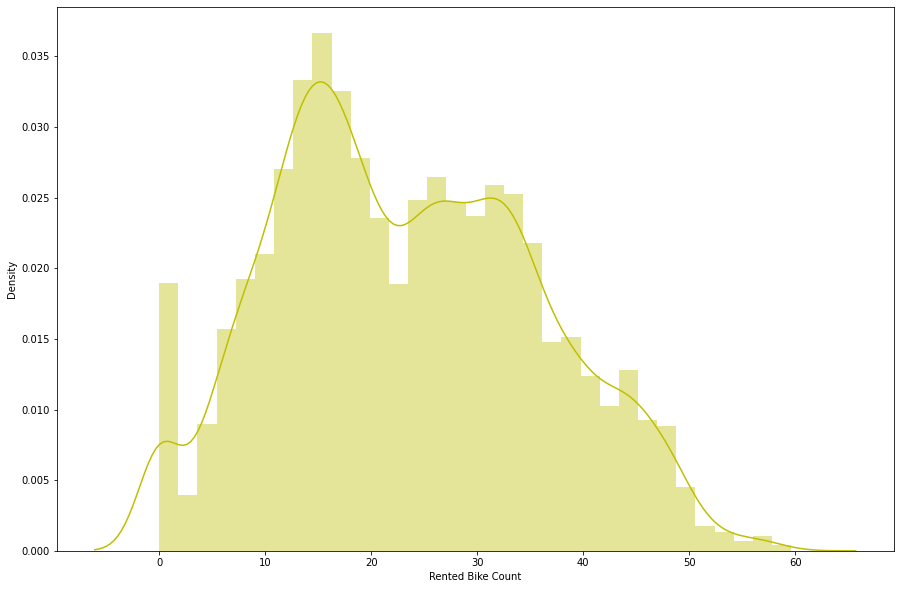

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(dataset['Rented Bike Count']),color="y")

here by using square_root transformation after normalisation values of Rented bike Count lied between 0 to 60

## Assign dependent variable/ feature(y) and independentvariables/features(x)

In [ ]:
X = df.drop(columns='Rented Bike Count')
y = np.sqrt(df['Rented Bike Count'])

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,2017,0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,2017,0,0,0,1,1,1


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

### Train - test split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


### **1.linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.6589737045298947

In [ ]:
reg.coef_

array([ 5.05762436e-01,  4.66401927e-01, -1.59653619e-01,  1.18519437e-01,
        7.47206754e-05, -8.13341790e-01, -1.64364241e+00, -3.64798105e-02,
        6.76954646e-03, -2.40757393e+00, -7.40933987e-01, -3.20689656e+00,
       -2.96198543e+00, -9.11737482e+00,  3.15657054e+00,  2.86356294e+01])

In [ ]:
scoring = 'accuracy'

In [ ]:
y_pred = reg.predict(X_test)
print("linear grgression accuracy:",y_pred)

linear grgression accuracy: [28.77446815 34.07402264 36.3655116  ... 28.21182203  6.43251106
 36.67200793]


In [ ]:
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 55.60736661527685
RMSE : 7.4570347065892655
R2 : 0.6387175261634002
Adjusted R2 :  0.6353858145891145


**63.87% with linearRegression**

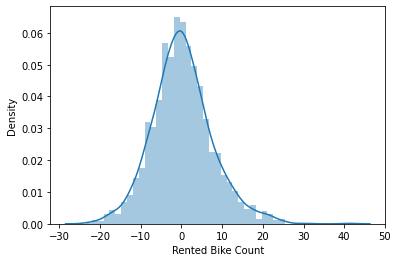

In [ ]:
sns.distplot(y_test-y_pred)

### **2. LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 100)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)



0.6589722214713878

In [ ]:
y_pred_l = lasso.predict(X_test)
print("lasso regression accuracy:", y_pred_l)

lasso regression accuracy: [28.78476694 34.07874135 36.3771277  ... 28.17847518  6.43937502
 36.68044683]


In [ ]:
MSE  = mean_squared_error(y_test,y_pred_l)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred_l)
print("R2 :" ,r2)
adj_r2=1-(1-r2_score(y_test,y_pred_l))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 55.601587904000475
RMSE : 7.456647229418895
R2 : 0.6387550705973951
Adjusted R2 :  0.6354237052542011


**63.87% with lasso regression**

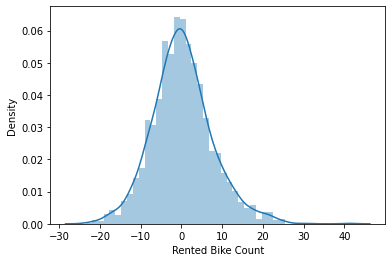

In [ ]:
sns.distplot(y_test-y_pred_l)

###**3.Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.658973660114167

In [ ]:
y_pred_3 = ridge.predict(X_test)
y_pred_3

array([28.77536211, 34.07417153, 36.36595009, ..., 28.20837097,
        6.43322285, 36.67260352])

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_3)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred_3)
print("R2 :" ,r2)
adj_r2=1-(1-r2_score(y_test,y_pred_3))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 55.60603344706852
RMSE : 7.456945316084095
R2 : 0.6387261877911246
Adjusted R2 :  0.6353945560935211


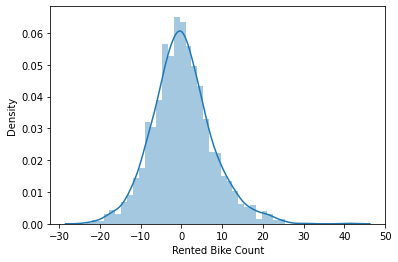

In [ ]:
sns.distplot(y_test-y_pred_3)

**63.54% with Ridge regression**

### **XGboost**

In [ ]:
from xgboost import XGBClassifier

#Model 2 - XGB Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 52.43389039508602
RMSE : 7.241124939889245
R2 : 0.6593356818013834
Adjusted R2 :  0.6561941088381684


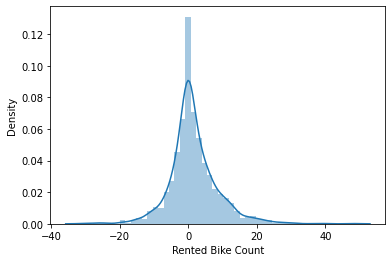

In [ ]:
sns.distplot(y_test-y_pred)

66.41% with XGBoost

### **4. Decision Tree**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
des_regressor = DecisionTreeRegressor(random_state=10)
cross_val_score(des_regressor,X_train,y_train,cv=10).mean()

0.8369601286190329

In [ ]:
des_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=10)

In [ ]:
y_pred_des = des_regressor.predict(X_test)
print("Decision Tree accuracy:", y_pred_des)

Decision Tree accuracy: [40.9633983  28.24889378 27.45906044 ... 15.71623365 16.34013464
 26.38181192]


In [ ]:
MSE  = mean_squared_error(y_test,y_pred_des)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred_des)
print("R2 :" ,r2)
adj_r2=1-(1-r2_score(y_test,y_pred_des))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 24.644948168442358
RMSE : 4.9643678518460295
R2 : 0.8398811455419016
Adjusted R2 :  0.8384045451549682


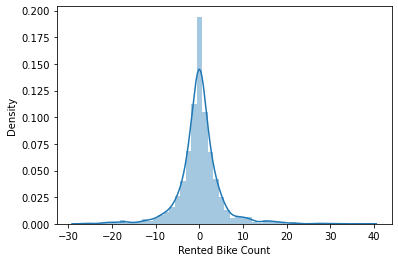

In [ ]:
sns.distplot(y_test-y_pred_des)

**83.84% with decision tree**

###**5.Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 15)]
random_grid = {'n_estimators': n_estimators}
print(random_grid)

{'n_estimators': [50, 153, 257, 360, 464, 567, 671, 775, 878, 982, 1085, 1189, 1292, 1396, 1500]}


In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42)

In [ ]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'n_estimators': [50, 153, 257, 360, 464,
                                                         567, 671, 775, 878,
                                                         982, 1085, 1189, 1292,
                                                         1396, 1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
predictions=rf_random.predict(X_test)
print("Random forest accuracy :",predictions)

Random forest accuracy : [42.44743334 27.01086514 26.20739369 ... 15.81992467 15.54145621
 26.02764648]


In [ ]:
MSE  = mean_squared_error(y_test,predictions)
print("MSE :" , MSE)
    
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,predictions)
print("R2 :" ,r2)
adj_r2=1-(1-r2_score(y_test,predictions))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MSE : 11.984974550433446
RMSE : 3.461932198994291
R2 : 0.9221333158175534
Adjusted R2 :  0.9214152368856116


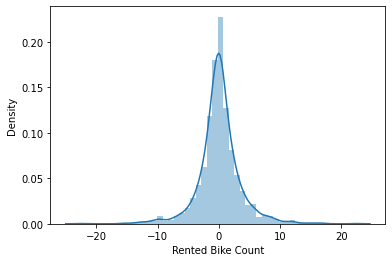

In [ ]:
sns.distplot(y_test-predictions)

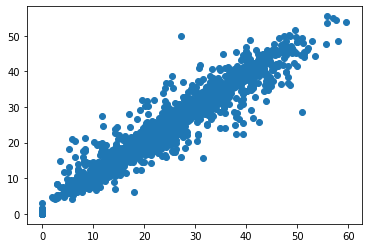

In [ ]:
plt.scatter(y_test,predictions)

**92.15% with Random Forest Regression**

### **MODEL EXPLANABILITY**

## **1.shape:**

In [ ]:
pip install shap

In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [ ]:
for_instance=2

In [202]:
#shape for random forest model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(rf_random.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [203]:
#shape for decision tree model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(des_regressor)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

The average value that is the base value of an outcome is typically right here is 23.44 and features in "red" are contributing to driving all these values above the base value. Features in "blue" are driving all the values below the base value. The direction is showing you the importance of every feature to driving it above or below the base value.

In [204]:
X_test.mean().round()

Hour                         11.0
Temperature(°C)              13.0
Humidity(%)                  58.0
Wind speed (m/s)              2.0
Visibility (10m)           1437.0
Solar Radiation (MJ/m2)       1.0
Rainfall(mm)                  0.0
Snowfall (cm)                 0.0
month                         7.0
year                       2018.0
weekdays_weekend              0.0
Seasons_Spring                0.0
Seasons_Summer                0.0
Seasons_Winter                0.0
Holiday_No Holiday            1.0
Functioning Day_Yes           1.0
dtype: float64

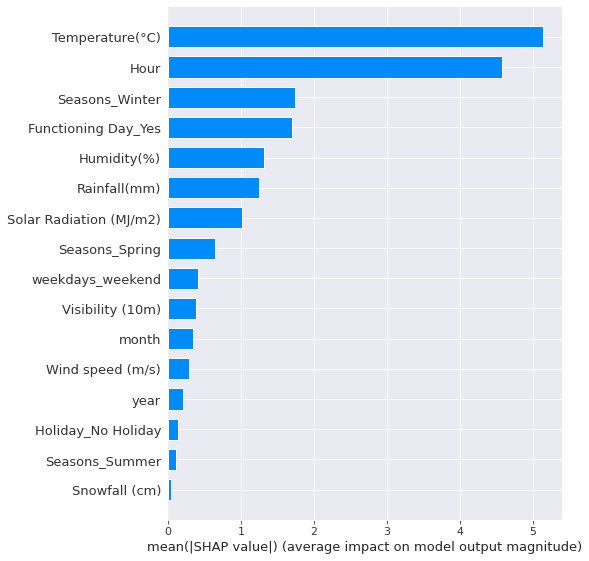

In [205]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_train, plot_type="bar")




A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

Here, we can see the feature importance for respective classes in a descending order. 

Features like Tempreature, hour, winter seson and functioning days having higher importance.

## **2.eli5**

In [206]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.0 MB/s 
     |████████████████████████████████| 133 kB 60.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=86e51b37ab5ab972a3ba4d9e2beffaaf2b907f906ab7cb0bd58a09fc2816e361
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [207]:
import eli5 as eli


In [208]:
feature_names=list(X_test.columns)

In [209]:
for_instance=2

In [210]:
#eli5 for random forest model 
eli.show_prediction(rf_random.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

The resulting information for us showed what is the probability for class 1 and what is the score for being in class 1. In the table above, we can see Contribution, features, and values. We can say contribution as the weights (W0 for bias, W1, W2,…, Wn.) and value as (X0 for bias, X1, X2,…, Xn). Missing indicates that the feature having xyz contribution was removed after feature selection.

In [211]:
#eli5 for decision tree regressor model 
eli.show_prediction(des_regressor, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

The resulting information for us showed what is the probability for class 1 and what is the score for being in class 1. In the table above, we can see Contribution, features, and values. We can say contribution as the weights (W0 for bias, W1, W2,…, Wn.) and value as (X0 for bias, X1, X2,…, Xn). Missing indicates that the feature having xyz contribution was removed after feature selection.

###**Final Conclusion:**

1.non holiday or working days has comparatively high demand of rented bike as compared holiday or non-working days.

2.functioning days has comparatively vey high demand of rented bike as compared to non functioning day.

3.It is clear that at the moring in between 7am to 9am and at evening between 5pm to 7pm their is high demand. menas from this we say that at office time high demands of bike.

4.People prefered more rented bikes in the morning than the evening.

5.less demand of Rented bike in the month of january,February,march i.e during cold winter seasons and maximum demand of bikes during May,June i.e during hot Summer seasons and octomber month also.

6.we can say that if Temprature increase demand of Rented Bike Decrease also their is perticular range which shows the high demand of bike like approx 20 drg and 3drg.

7.if Snowfall increase demand of Rented Bike Decreases

8.When the rainfall was less, people have booked more bike.

9.The Temperature, Hour,winter season and fuctioning day  are the most important features that positively drives the total rented bike count.


## **Conclusion from Model Training**

After performing the various models like linear regression, lasso , ridge , decision tree and random forest, the decision tree and random forest gives the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the random forest and decision tree !

here,
1. Decision tree gives accuracy score around 84%.
2. random forest model gives better accuracy than decision tree around 92%

